# Avaliação	de	Aprendizagem	de	Máquina	em	Data	Science/Data	Analytics

Luan Prates 07 setembro de 2018

## Questão 7

Carregue os dados contidos no Dataset de Iris do scikit-learn. - Divida o conjunto de dados entre treino e teste.  - Utilize a Gradient Boosted Decision Tree (GradientBoostingClassifier) para realizar a classificação dos dados carregados. 
Varie o parâmetro n_estimators de 1 a 100 (de 10 em 10) e mostre um gráfico contendo a diferença entre os scores obtidos no conjunto de treino para cada valor do parâmetro n_estimators. - Varie o parâmetro n_estimators de 1 a 100 (de 10 em 10) e mostre um gráfico contendo a diferença entre os scores obtidos no conjunto de teste para cada valor do parâmetro n_estimators. Justifique as diferenças apresentadas em nos gráficos do treino e do teste para cada valor de n_estimators. Apresente a matriz de confusão dos dados de teste. Compare os resultados obtidos pela Random Forest e a Gradient Boosted Decision Tree, considerando acurácia e matriz de confusão, e diga qual deveria ser utilizada.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-paper')
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
iris = datasets.load_iris()
X = iris.data
X_scale = scale(X)
y = iris.target
class_names = iris.target_names

In [3]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_scale, y, 
                                                        test_size = 0.20, 
                                                        random_state = 7)

In [4]:
n_estimadores = np.arange(0, 101, 10)
n_estimadores[0] = 1
n_estimadores

array([  1,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [5]:
treino = []
teste = []
for n in n_estimadores:
    model = GradientBoostingClassifier(n_estimators=n)
    model.fit(X_treino, y_treino)
    treino.append(model.score(X_treino, y_treino))
    teste.append(model.score(X_teste, y_teste))

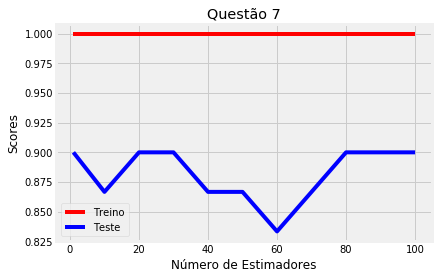

In [6]:
plt.plot(n_estimadores, treino, c='r', label='Treino')
plt.plot(n_estimadores, teste, c='b', label='Teste')
plt.title('Questão 7')
plt.ylabel('Scores')
plt.xlabel('Número de Estimadores')
plt.legend()
plt.savefig('imagens/Questão-7.png', transparent = True)
plt.show()

In [7]:
y_pred = model.predict(X_teste)
cm = confusion_matrix(y_teste, y_pred)

In [8]:
plt.style.use('seaborn-paper')

In [9]:
print(__doc__)

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe')
    plt.xlabel('Predição')
    #plt.savefig('imagens/Questão-72.png', transparent = True)

Automatically created module for IPython interactive environment


In [10]:
np.set_printoptions(precision=2)

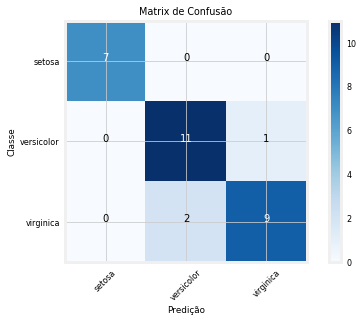

In [11]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Matrix de Confusão')
